# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


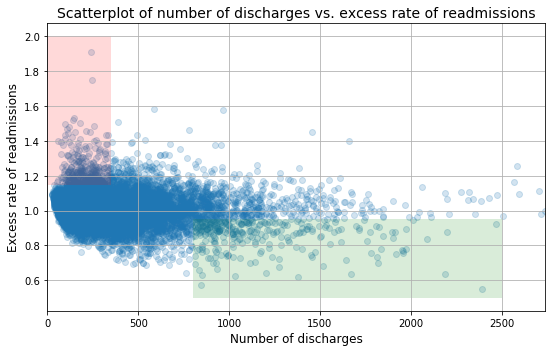

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn 
# Do some examination of the data

In [6]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.reset_index().tail()

,index,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11573,8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
11574,6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
11575,1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
11576,13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
11577,13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [9]:
srs=clean_hospital_read_df["Number of Discharges"].reset_index()

In [10]:
srs[srs["Number of Discharges"]>0].head(1)

,index,Number of Discharges
81,1832,25


First row with a non-zero discharge number is 81. This is the reason for why during plotting, the index is chosen to start from 81. 

In [11]:
srs[srs["Number of Discharges"]>0].tail(5)

,index,Number of Discharges
11573,8126,2716
11574,6643,2740
11575,1892,3570
11576,13615,3980
11577,13666,6793


In [12]:
df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['Discharges', 'Ratio']

In [13]:
df.head()

,Discharges,Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [18]:
df.describe()

,Discharges,Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [16]:
df.head()

,Discharges,Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Discharges    11497 non-null int32
Ratio         11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


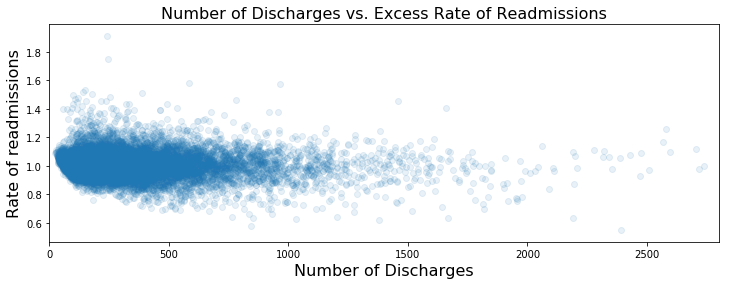

In [24]:
plt.figure(figsize=(12, 4))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(0,2800)
plt.xlabel('Number of Discharges', fontsize=16)
plt.ylabel('Rate of readmissions', fontsize=16)
plt.title('Number of Discharges vs. Excess Rate of Readmissions',fontsize=16)
plt.show();

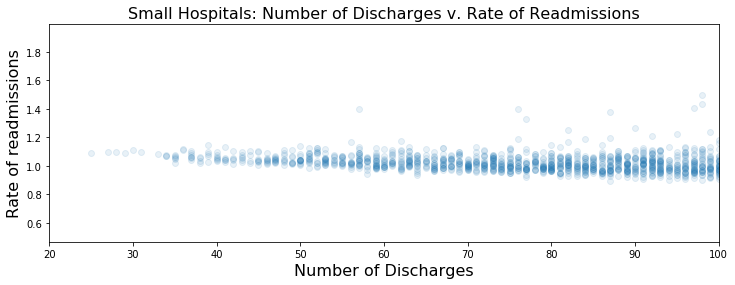

In [25]:
plt.figure(figsize=(12,4))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(20,100)
plt.xlabel('Number of Discharges', fontsize=16)
plt.ylabel('Rate of readmissions', fontsize=16)
plt.title('Small Hospitals: Number of Discharges v. Rate of Readmissions', fontsize=16)
plt.show();

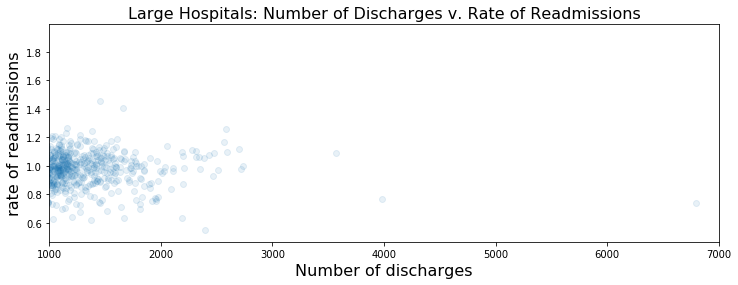

In [26]:
plt.figure(figsize=(12,4))
plt.scatter(x=df.Discharges, y=df.Ratio, alpha = .1)
plt.xlim(1000,7000)
plt.xlabel('Number of discharges', fontsize=16)
plt.ylabel('rate of readmissions', fontsize=16)
plt.title('Large Hospitals: Number of Discharges v. Rate of Readmissions', fontsize=16)
plt.show();

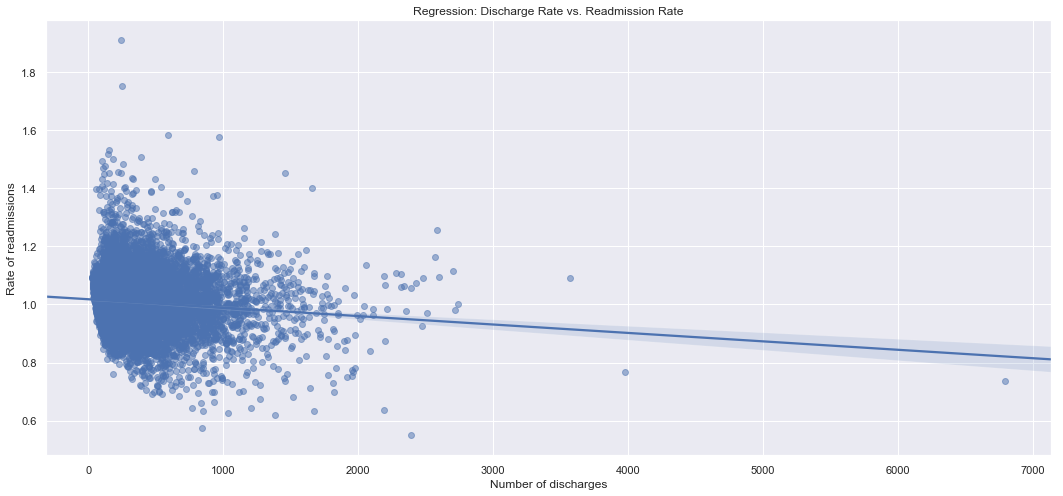

In [29]:
# number of discharges v. rate of readmission for all hospitals
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)})


ax = sns.regplot(x='Discharges', y='Ratio', data=df, scatter_kws={'alpha':0.5})


plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Rate of readmissions', fontsize=12)
ax.set_title('Regression: Discharge Rate vs. Readmission Rate');

In [30]:
small_hospitals = df[df.Discharges<100]


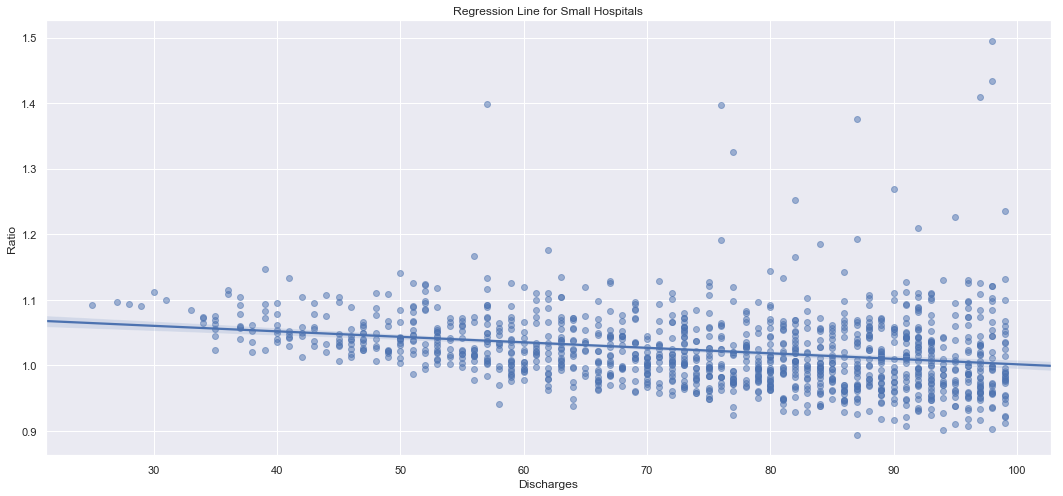

In [31]:
# number of discharges v. rate of readmission for small hospitals
ax = sns.regplot(x='Discharges', y='Ratio', data=small_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line for Small Hospitals');

In [32]:
large_hospitals = df[(df.Discharges>1000)]

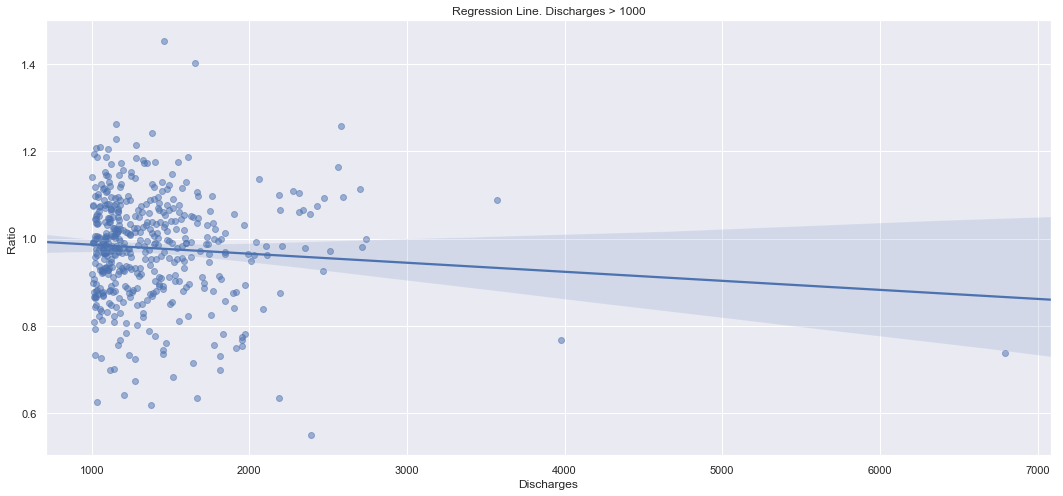

In [33]:
ax = sns.regplot(x='Discharges', y='Ratio', data=large_hospitals, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges > 1000');

In [37]:
# calculate means for both groups
sm = np.mean(small_hospitals.Ratio)
lg = np.mean(large_hospitals.Ratio)
diff = sm - lg


print('Means\nSmall Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n\nDifference: {:0.5}'.format(sm, lg, diff))

Means
Small Hospitals: 1.0226
Large Hospitals: 0.97834

Difference: 0.044283


A. Do you agree with the above analysis and recommendations? Why or why not?

$H_0$: There is no correlation between the number of discharges and the readmission rate.
$H_A$: A hospital's readmission rate is correlated with the number of discharges.

$$H_0: r = 0$$ $$H_A: r \neq 0$$

Q: Compute and report the observed significance value (or p-value) and report statistical significance for $\alpha$ = .01.

The formula for the significance test for the Pearson correlation coefficient is: $$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

Lets first use the frequentist approach

In [40]:
import scipy.stats as stats

# calculating the correlation coefficient
r = np.corrcoef(df.Discharges, df.Ratio)[0][1]
# since r = 0 the formula for test statistic becomes: r * √(n-2)/(1-r2)
n = len(df.Discharges)
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2


print('observed r: \t {:0.5}\n\nFrequentist Approach\nt-statistic: \t {:0.5}\np-value: \t {:0.5}'.format(r, t_stat, p_value))

observed r: 	 -0.097398

Frequentist Approach
t-statistic: 	 -10.492
p-value: 	 1.2225e-25


In [42]:
# Null hypothesis: r = 0.
hyp_r = 0
# Observed corr coeff
obs_r, obs_p_value = stats.pearsonr(df.Discharges, df.Ratio)


bs_r = np.empty(10000)
bs_p = np.empty(10000)


# generate pairs bootstrap samples
for i in range(10000):
    idx = np.random.choice(range(n), n)
    bs_r[i], bs_p[i] = stats.pearsonr(df.Discharges, df.Ratio)


bs_r_mean = np.mean(bs_r)
bs_p_mean = np.mean(bs_p)


print('BOOTSTRAP RESULTS\nBootstrap r: \t \t {:0.5}\n|obs r - bs r| : \t {:0.5}'.format(bs_r_mean, np.abs(obs_r - bs_r_mean)))


print('\nBootstrap p-value: \t {:0.5}'.format(bs_p_mean))

BOOTSTRAP RESULTS
Bootstrap r: 	 	 -0.097398
|obs r - bs r| : 	 1.3878e-17

Bootstrap p-value: 	 1.2225e-25


Since the p-value from both approaches is very low, we can conclude that the null hypothesis that there is no correlation between the size of the hospital and the readmission rate must be rejected. 
The correlation coefficient is around -0.1 which indicates a very small negative correlation between the size of the hospital and the excess readmissions rate. In other words, the readmissions rate decreases slightly with increase in hospital size. 

The threshold for the readmission rate to be deemed excessive is 1. The mean of the smallest hospitals' readmission rate is less than 2% above the threshold, and less than 4% above the mean readmission rate of the large hospitals.



Q: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Analysis:
The analysis conducted seems to be correct but the recommendation to consolidate smaller facilities into larger ones may or may not work. Correlation does not mean causation and so other factors which may be contributing to readmissions rate must be ruled out. Also consolidation of smaller facilities to larger ones can require time and capital so a cost benefit analysis needs to be conducted. 
Also we can see that while readmissions rate and hospital size are correlated in a statistically significant way, there may not be much practical significance to this correlation because it is so small. The proposal to consolidate smaller facilities to larger ones might cost significantly more than  any potential benefits due to dropped readmissions rate. Also, we are still not entirely sure if the size of the hospital is the causal factor for readmissions rate. 

C:\Users\Ravi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


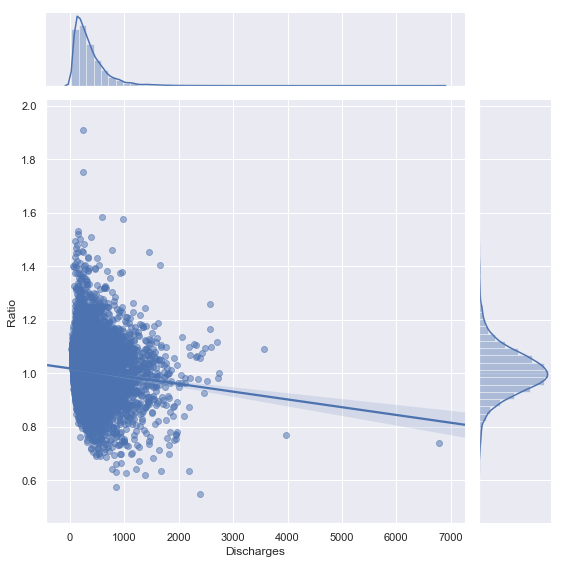

In [43]:
g = sns.jointplot('Discharges', 'Ratio', data=df, kind = 'reg', size = 8, scatter_kws = {'alpha' : 0.5})
